In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("./spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
encoder=LabelEncoder()
df["Target"]=encoder.fit_transform(df["Target"])

In [10]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [12]:
df.duplicated().sum()

402

In [13]:
df=df.drop_duplicates(keep="first")

In [14]:
df.duplicated().sum()


0

EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df.Target.value_counts()

0    4516
1     654
Name: Target, dtype: int64

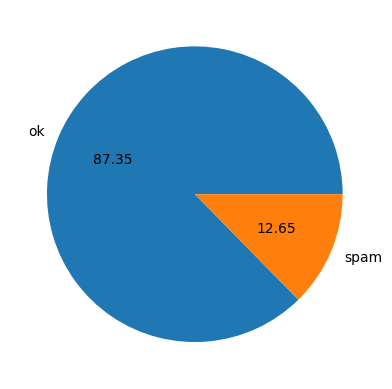

In [17]:
plt.pie(df.Target.value_counts(),labels=["ok","spam"],autopct="%0.2f")
plt.show()

In [18]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df["num_char"]=df.Text.apply(len)

In [20]:
df["num_word"]=df.Text.apply(lambda x: len(nltk.word_tokenize(x)))

In [21]:
df.head()

,Target,Text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
df["num_sentence"]=df.Text.apply(lambda x: len(nltk.sent_tokenize(x)))


In [23]:
df.drop("Target",axis=1).describe()

,num_char,num_word,num_sentence
count,5170.000000,5170.000000,5170.000000
mean,78.932882,18.289362,1.962669
std,58.173099,13.227017,1.434033
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


<AxesSubplot: xlabel='num_char', ylabel='Count'>

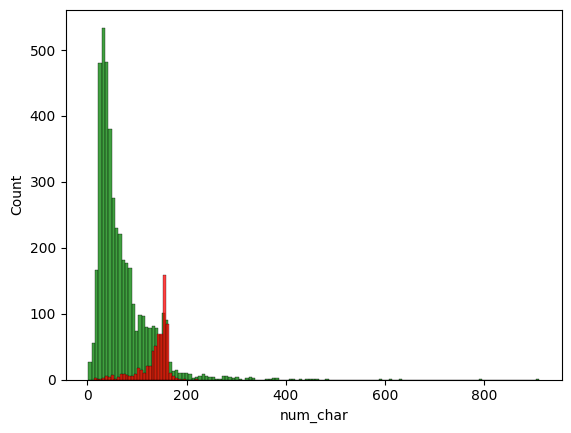

In [24]:
sns.histplot(df[df.Target==0]["num_char"],color="green")
sns.histplot(df[df.Target==1]["num_char"],color="red")

<AxesSubplot: xlabel='num_word', ylabel='Count'>

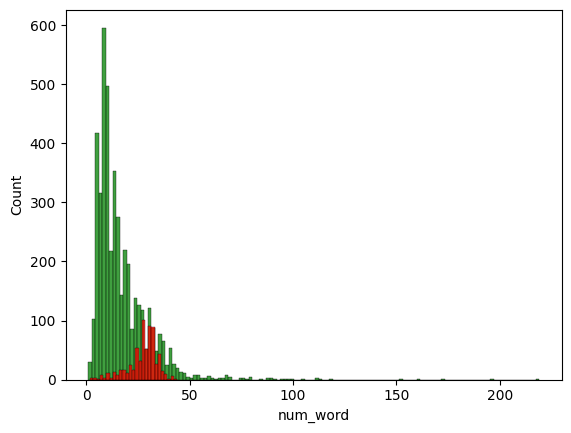

In [25]:
sns.histplot(df[df.Target==0]["num_word"],color="green")
sns.histplot(df[df.Target==1]["num_word"],color="red")

<AxesSubplot: xlabel='num_sentence', ylabel='Count'>

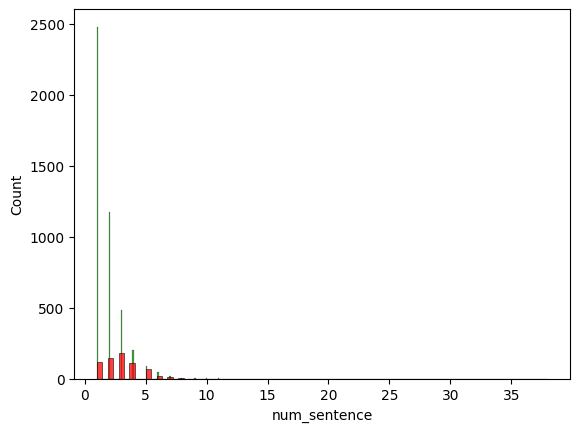

In [26]:
sns.histplot(df[df.Target==0]["num_sentence"],color="green")
sns.histplot(df[df.Target==1]["num_sentence"],color="red")

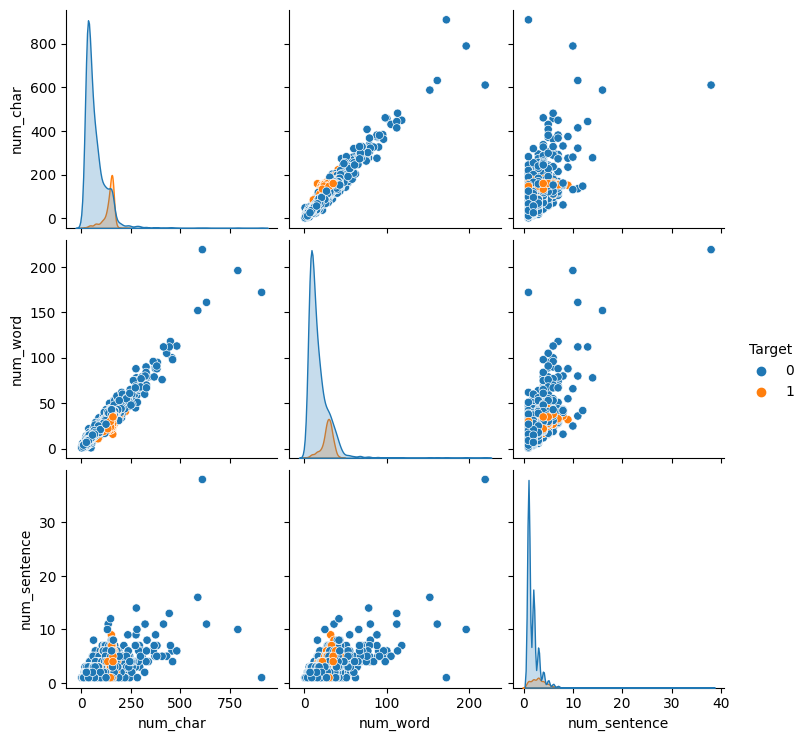

In [27]:
sns.pairplot(df,hue="Target")

D:\Temp\ipykernel_4924\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

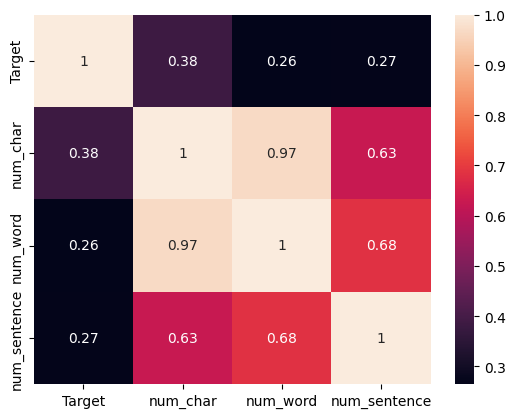

In [28]:
sns.heatmap(df.corr(),annot=True)


Preprcocessing
- Lower case
- Tokenize
- Removespecial char , stop words , punct
- Stem


In [29]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    for i in text:
        a=ps.stem(i)
        y.append(a)
            
    return " ".join(y)

In [31]:
text_transform("hi how are you %20 ?")

'hi 20'

In [32]:
text_transform("did you liking my code ?")

'like code'

In [33]:
df["transform"]=df["Text"].apply(text_transform)

In [34]:
df.head()

,Target,Text,num_char,num_word,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
# df.iloc[1,:]

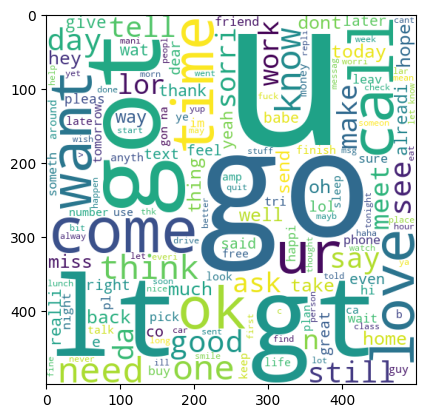

In [36]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")
ham=wc.generate(df[df["Target"]==0]["transform"].str.cat(sep=" "))
plt.imshow(ham)

In [37]:
spam_cor=[]

for msg in df[df["Target"]==1]["transform"].tolist():
    for word in msg.split():
        spam_cor.append(word)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, 'prize'),
  Text(12, 0, '4'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'win'),
  Text(26, 0, 'week'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min'),
  Text(30, 0, 'custom'),
  Text(31, 0, 'guarante'),
  Text(32, 0, 'messag'),
  Text(33, 0, 'per

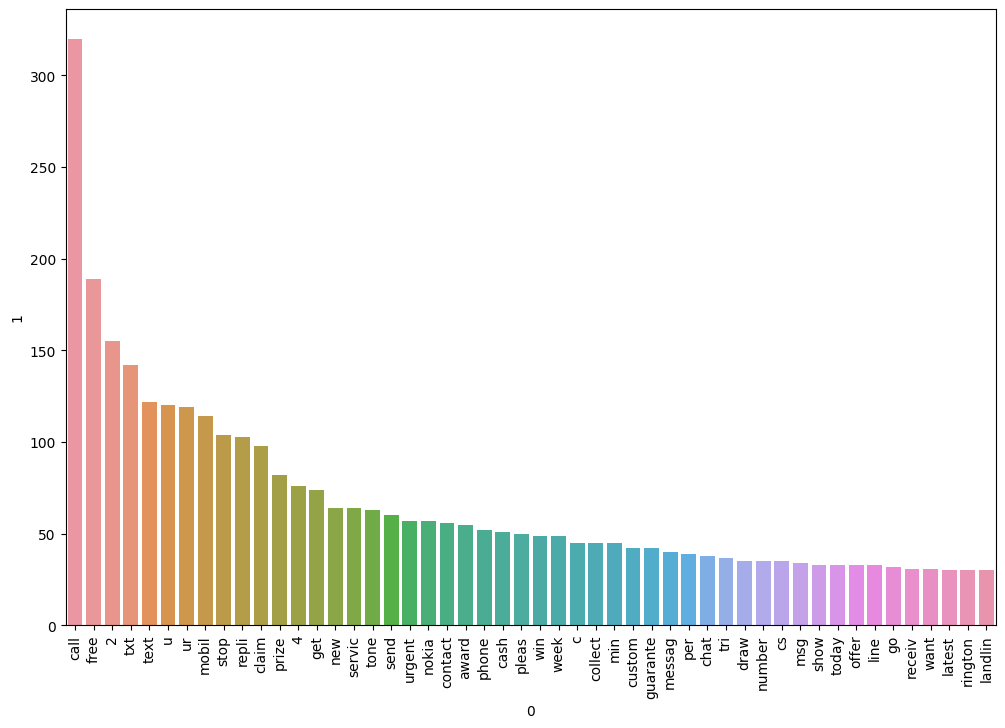

In [53]:
from collections import Counter
plt.figure(figsize=(12,8))
a=pd.DataFrame(Counter(spam_cor).most_common(50))[0]
b=pd.DataFrame(Counter(spam_cor).most_common(50))[1]
sns.barplot(x=a,y=b)
plt.xticks(rotation=90)

In [54]:
ham_cor=[]

for msg in df[df["Target"]==0]["transform"].tolist():
    for word in msg.split():
        ham_cor.append(word)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'like'),
  Text(9, 0, 'know'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'good'),
  Text(13, 0, 'want'),
  Text(14, 0, 'ok'),
  Text(15, 0, 'love'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, '4'),
  Text(21, 0, 'lor'),
  Text(22, 0, 'think'),
  Text(23, 0, 'home'),
  Text(24, 0, 'see'),
  Text(25, 0, 'still'),
  Text(26, 0, 'take'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make'),
  Text(30, 0, 'say'),
  Text(31, 0, 'back'),
  Text(32, 0, 'hope'),
  Text(33, 0, 'ask'),
  Text(34, 0, 'n'),
  Text(35

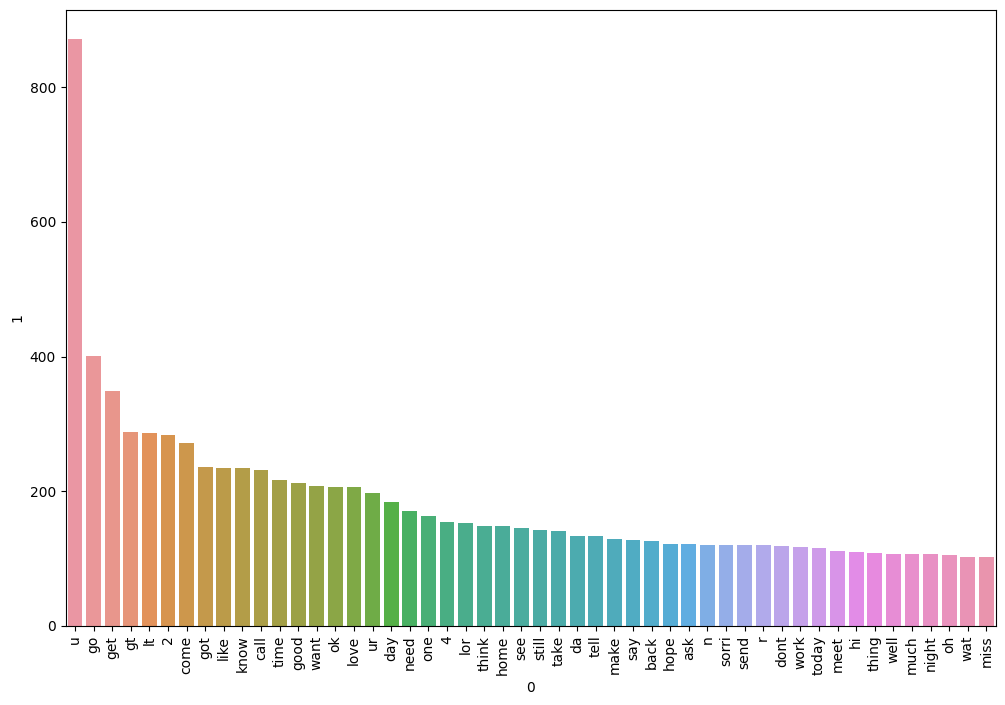

In [55]:
from collections import Counter
plt.figure(figsize=(12,8))
ah=pd.DataFrame(Counter(ham_cor).most_common(50))[0]
bh=pd.DataFrame(Counter(ham_cor).most_common(50))[1]
sns.barplot(x=ah,y=bh)
plt.xticks(rotation=90)

In [56]:
df.head()

,Target,Text,num_char,num_word,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [180]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
ct=CountVectorizer()
tfdt=TfidfVectorizer(max_features=3000)
X=tfdt.fit_transform(df["transform"]).toarray()

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [181]:
y=df["Target"].values

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=12)

In [183]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [184]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [185]:
gnb.fit(x_train,y_train)
ypred_gnb=gnb.predict(x_test)
print(accuracy_score(y_test,ypred_gnb))
print(precision_score(y_test,ypred_gnb))
print(confusion_matrix(y_test,ypred_gnb))

0.8615622583139985
0.48986486486486486
[[969 151]
 [ 28 145]]


In [186]:
mnb.fit(x_train,y_train)
ypred_mnb=mnb.predict(x_test)
print(accuracy_score(y_test,ypred_mnb))
print(precision_score(y_test,ypred_mnb))
print(confusion_matrix(y_test,ypred_mnb))

0.9737045630317092
1.0
[[1120    0]
 [  34  139]]


In [187]:
bnb.fit(x_train,y_train)
ypred_bnb=bnb.predict(x_test)
print(accuracy_score(y_test,ypred_bnb))
print(precision_score(y_test,ypred_bnb))
print(confusion_matrix(y_test,ypred_bnb))

0.979891724671307
0.9867549668874173
[[1118    2]
 [  24  149]]


In [188]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


svc=SVC(kernel="sigmoid", gamma=1)
knn=KNeighborsClassifier()
xgb=XGBClassifier()
gbo=GradientBoostingClassifier(n_estimators=50,random_state=42)
rf=RandomForestClassifier(n_estimators=50,random_state=42)
bc=BaggingClassifier(n_estimators=50,random_state=42)
ada=AdaBoostClassifier(n_estimators=50,random_state=42)
lr=LogisticRegression(random_state=42)
dt=DecisionTreeClassifier(random_state=42)



In [189]:
clfs={
    "svm":svc,
    "knn":knn,
    "xgb":xgb,
    "rf":rf,
    "gbo":gbo,
    "dt":dt,
    "bc":bc,
    "ada":ada,
    "lr":lr
}

In [190]:
def train(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    return acc,prec

In [142]:
train(svc,x_train,y_train,x_test,y_test)

(0.9767981438515081, 0.9798657718120806)

In [191]:
acc_scrore=[]
prec_score=[]

for name,clf in clfs.items():
    curr_acc,curr_prec = train(clf,x_train,y_train,x_test,y_test)
    acc_scrore.append(curr_acc)
    prec_score.append(curr_prec)

In [147]:
perform=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":acc_scrore,"Precision":prec_score}).sort_values("Accuracy",ascending=False)

In [193]:
perform_max=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_max":acc_scrore,"Precision_max":prec_score}).sort_values("Accuracy_max",ascending=False)
doneDF=newdf1.merge(perform_max,on="Algorithm")
doneDF.drop(["Accuracy_max_x","Precision_max_x"],axis=1,inplace=True)

In [197]:
doneDF.rename(columns={"Accuracy_max_y":"Accuracy_max","Precision_max_y":"Precision_max"},inplace=True)

In [198]:
doneDF

,Algorithm,Accuracy,Precision,Accuracy_scale,Precision_scale,Accuracy_max,Precision_max
0,svm,0.976798,0.979866,0.972158,0.936306,0.978345,0.980132
1,rf,0.970611,1.000000,0.972931,0.992857,0.972931,0.992857
2,xgb,0.965971,0.921569,0.967517,0.945578,0.967517,0.945578
3,bc,0.958237,0.869565,0.954370,0.847561,0.954370,0.847561
4,dt,0.957463,0.843023,0.948956,0.809249,0.948956,0.809249
5,ada,0.957463,0.904110,0.962877,0.937063,0.962877,0.937063
6,gbo,0.948956,0.890511,0.948956,0.884892,0.948956,0.884892
7,lr,0.946636,0.972727,0.969064,1.000000,0.951276,0.974138
8,knn,0.895592,1.000000,0.904872,1.000000,0.904099,0.980392


In [179]:
perform_scale=pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy_scale":acc_scrore,"Precision_scale":prec_score}).sort_values("Accuracy_scale",ascending=False)
newdf1=newdf.merge(perform_scale,on="Algorithm")
newdf1

,Algorithm,Accuracy,Precision,Accuracy_max,Precision_max,Accuracy_scale,Precision_scale
0,svm,0.976798,0.979866,0.972158,0.936306,0.972158,0.936306
1,rf,0.970611,1.000000,0.972931,0.992857,0.972931,0.992857
2,xgb,0.965971,0.921569,0.967517,0.945578,0.967517,0.945578
3,bc,0.958237,0.869565,0.954370,0.847561,0.954370,0.847561
4,dt,0.957463,0.843023,0.948956,0.809249,0.948956,0.809249
5,ada,0.957463,0.904110,0.962877,0.937063,0.962877,0.937063
6,gbo,0.948956,0.890511,0.948956,0.884892,0.948956,0.884892
7,lr,0.946636,0.972727,0.969064,1.000000,0.969064,1.000000
8,knn,0.895592,1.000000,0.904872,1.000000,0.904872,1.000000


In [164]:
newdf=perform.merge(perform_max,on="Algorithm")
newdf

,Algorithm,Accuracy,Precision,Accuracy_max,Precision_max
0,svm,0.976798,0.979866,0.972158,0.936306
1,rf,0.970611,1.000000,0.972931,0.992857
2,xgb,0.965971,0.921569,0.967517,0.945578
3,bc,0.958237,0.869565,0.954370,0.847561
4,dt,0.957463,0.843023,0.948956,0.809249
5,ada,0.957463,0.904110,0.962877,0.937063
6,gbo,0.948956,0.890511,0.948956,0.884892
7,lr,0.946636,0.972727,0.969064,1.000000
8,knn,0.895592,1.000000,0.904872,1.000000


In [199]:
doneDFmelted=pd.melt(doneDF,id_vars="Algorithm")
doneDFmelted

,Algorithm,variable,value
0,svm,Accuracy,0.976798
1,rf,Accuracy,0.970611
2,xgb,Accuracy,0.965971
3,bc,Accuracy,0.958237
4,dt,Accuracy,0.957463
5,ada,Accuracy,0.957463
6,gbo,Accuracy,0.948956
7,lr,Accuracy,0.946636
8,knn,Accuracy,0.895592
9,svm,Precision,0.979866


In [126]:
perfmelt=pd.melt(perform,id_vars="Algorithm")
perfmelt

,Algorithm,variable,value
0,rf,Accuracy,0.972931
1,svm,Accuracy,0.972158
2,lr,Accuracy,0.969064
3,xgb,Accuracy,0.967517
4,ada,Accuracy,0.962877
5,bc,Accuracy,0.954370
6,gbo,Accuracy,0.948956
7,dt,Accuracy,0.948956
8,knn,Accuracy,0.904872
9,rf,Precision,0.992857


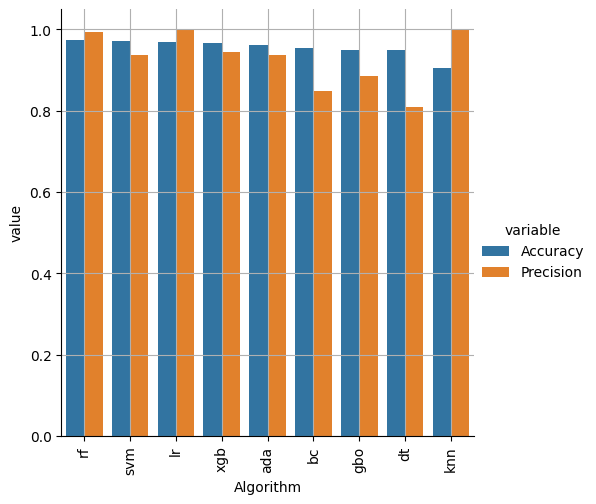

In [127]:
sns.catplot(data=perfmelt,x="Algorithm",y="value",kind="bar",hue="variable")
plt.grid()
plt.ylim=(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

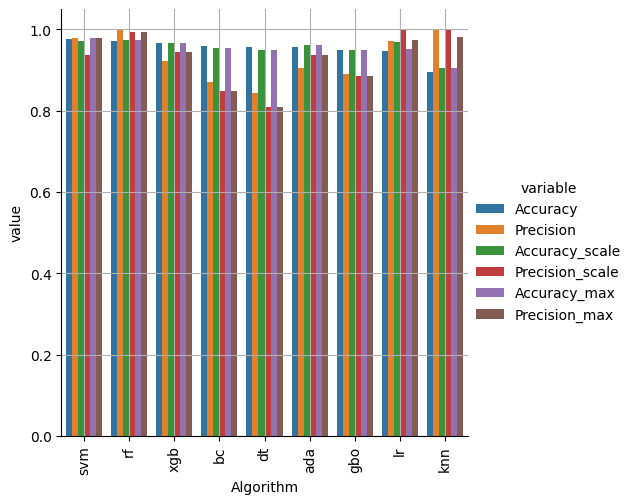

In [200]:
sns.catplot(data=doneDFmelted,x="Algorithm",y="value",kind="bar",hue="variable")
plt.grid()
plt.ylim=(0.5,1.0)
plt.xticks(rotation=90)
plt.show()

In [205]:
# voting

svm=SVC(kernel="sigmoid",gamma=1.0,probability=True)
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[("svm",svm),("mnb",mnb),("rf",rf),('lr',lr)])

In [207]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('mnb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=42)),
                             ('lr', LogisticRegression(random_state=42))])

In [210]:
ypred=voting.predict(x_test)
print("Accuracy :",accuracy_score(y_test,ypred))
print("Precision :",precision_score(y_test,ypred))

Accuracy : 0.9706109822119103
Precision : 1.0


## pickle

In [212]:
import pickle
pickle.dump(tfdt, open("vectorizer.pkl","wb"))
pickle.dump(mnb, open("model.pkl","wb"))